In [6]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score 

Matplotlib is building the font cache; this may take a moment.


In [7]:
# Importing the dataset 
## x = data, y = quadratic equation 
x = np.array(7 * np.random.rand(100, 1) - 3) 
#y = 13x^2 + 2x + 7
y = 13 * x*x + 2 * x + 7

In [8]:
x1 = x.reshape(-1, 1) 

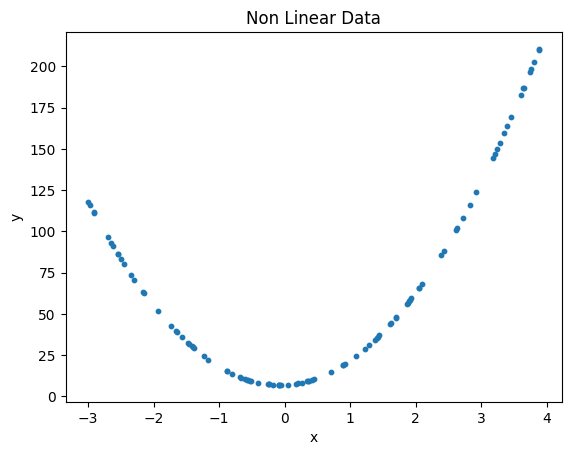

In [9]:
# data points 
plt.scatter(x, y, s = 10) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Non Linear Data') 
plt.show()

In [10]:
#polynomial degree 2
poly_features = PolynomialFeatures(degree = 2, include_bias = False) 
x_poly = poly_features.fit_transform(x1) 
x[3]

array([1.40245426])

In [11]:
x_poly[3]

array([1.40245426, 1.96687795])

In [12]:
model = LinearRegression() 
model.fit(x_poly, y) 

print('Coefficients of x are', model.coef_) 
print('Intercept value is', model.intercept_) 

# Predict 
y_deg2 = model.predict(x_poly)  

# model evaluation 
print('MSE of Polyregression model: %.2f' % mean_squared_error(y, y_deg2) ) 
print('R2 score of Non Linear model: ', model.score(x_poly, y)) 

Coefficients of x are [[ 2. 13.]]
Intercept value is [7.]
MSE of Polyregression model: 0.00
R2 score of Non Linear model:  1.0


In [13]:
#Another model for R2 score
from sklearn.metrics import r2_score 
r2_deg2 = r2_score(y, y_deg2) 
print('R2 score of Linear model: ', r2_deg2) 

R2 score of Linear model:  1.0


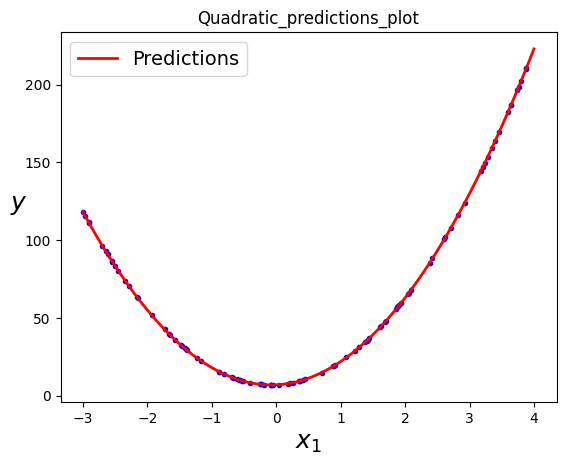

In [14]:
x_new = np.linspace(-3, 4, 100).reshape(100, 1) 
x_new_poly = poly_features.transform(x_new) 
y_new = model.predict(x_new_poly) 
plt.plot(x, y, "b.") 
plt.plot(x_new, y_new, "r-", linewidth = 2, label ="Predictions") 
plt.xlabel("$x_1$", fontsize = 18) 
plt.ylabel("$y$", rotation = 0,  fontsize = 18) 
plt.legend(loc ="upper left", fontsize = 14) 

plt.title("Quadratic_predictions_plot") 
plt.show() 

In [15]:
#From a group of 2 people
#select a secondary data (any type of data)
#Identify the X variables and Y variable
#Split the data for train data and test data (20%)
#Choose 2 different models : Linear Regression, Logistic Regression or Non-Linear Regression
#Conduct the analysis using the chosen models
#Identify and explain which model is the best model

#Name of Group Member

#Name of Group Member
Burhan, Comparison between Non-Linear and Linear Regression Model

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
path = 'boston.csv'
df1 = pd.read_csv(path)
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Linear Regression

In [20]:
data = pd.DataFrame(df1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
X = df1['LSTAT']
Y = df1['PRICE']

In [22]:
X = X.values.reshape(-1,1)

In [23]:
df1.shape

(506, 14)

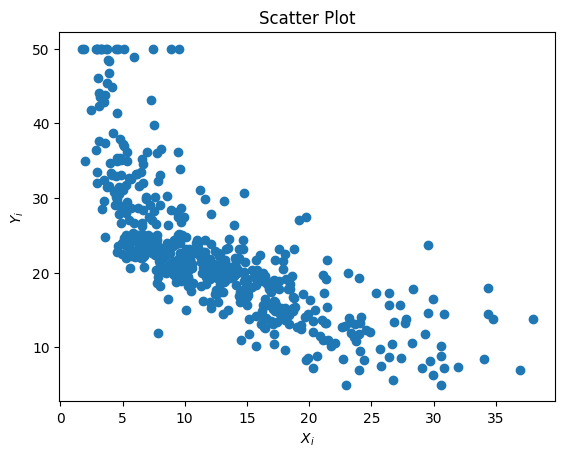

In [24]:
#plot
plt.scatter(X,Y)
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
plt.title("Scatter Plot")
plt.show()

In [25]:
#split data into train and test (test size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [26]:
# linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
#Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

#To calculate the 8 squared 
R2 = model.score(X_test, y_test)
print("R-Squared:: %.4f" % R2)

R-Squared:: 0.5042


In [28]:
#To claculate the b0 and b1 (Y hat = b0 +b1X = 34.87 -0.98X)
print("intercept (b0)", model.intercept_)
print("slope (b1)", model.coef_)

intercept (b0) 34.87291567862843
slope (b1) [-0.97981166]


In [29]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [30]:
# y_pred = model.intercept_ + model.coeff_ * X_test
y_pred = model.predict(X_test)
print("Predicted response:", y_pred, sep='\n')

#Find the mean square error
MSE = mean_squared_error(y_test, y_pred)
print("Mean square error: %.2f" % MSE)

Predicted response:
[31.80610519 30.26780089 26.24077499  0.80486439 28.42575498  8.77073316
 29.34677794 26.98543185 24.91802925 20.8028203  28.80788153 25.32955015
 25.10419347 28.0828209  27.29897158 22.458702    1.19678906 21.86101688
 14.15969727 24.96701983  5.79210572 23.97741006 30.81649542 24.72206692
 27.18139418 11.56319638 28.1416096  23.07598334 29.30758547 29.49374969
  9.9759015  11.38683028 18.8529951  18.47086855 26.37794862 22.86042477
 25.52551248 10.97530939 29.08222879 32.9328886  20.00917285  1.15759659
 27.42634709 16.2466961  27.63210754 28.92545893 -1.36051937 17.30489268
 21.05757133 11.20066607 21.06736944 22.3411246  26.11339947 14.94354659
 19.40168963 29.21940242 31.37498807 17.10893035 28.72949659 21.6944489
 20.83221465 24.96701983 18.02995331 30.37558018 23.62467787 15.50203924
 22.33132648 27.58311696 25.19237652 23.65407222 16.57003394 29.01364197
 18.99996685 15.49224112 22.98780029 30.46376323 20.73423348 13.85595565
 23.85003455 19.48987268 22.2627

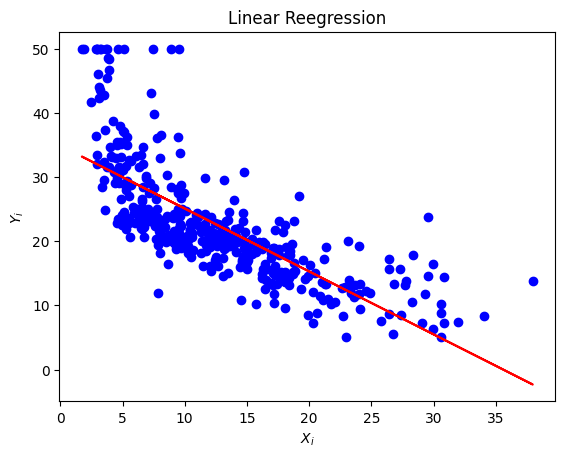

In [31]:
#Plot the fitted regression line
plt.scatter(X_train, y_train, color ='b')
plt.plot(X_train, model.predict(X_train), color = 'r')
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
plt.title("Linear Reegression")
plt.show()

In [32]:
#Stochostic Gradient Decent(SGD) for linear regressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
model2 = SGDRegressor()
model2.fit(X_train, y_train)

R2 = model2.score(X_test, y_test)
print("R-squared: %.4f" % R2)

y_pred2 = model2.predict(X_test)

MSE = mean_squared_error(y_test, y_pred2)
print("Mean squared error: %.2f" % MSE)

print("Coefficient: \n", model2.coef_)
print("Y_intercept", model2.intercept_)

R-squared: 0.5061
Mean squared error: 38.67
Coefficient: 
 [-0.94169811]
Y_intercept [34.01314804]


Non-Linear Regression

In [33]:
path = 'boston.csv'
df2 = pd.read_csv(path)
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
data = pd.DataFrame(df2)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
y = data["LSTAT"]
x = data['PRICE']

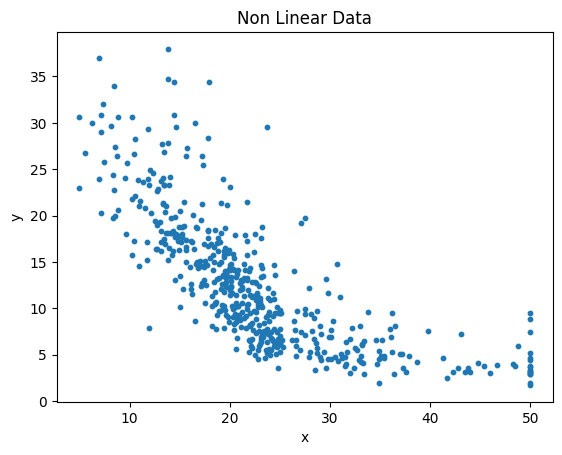

In [36]:
# Plot the data
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non Linear Data')
plt.show()

In [37]:
x = x.values.reshape(-1,1)

In [38]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

print('Coefficients of x are', model.coef_)
print('Intercept value is', model.intercept_)

# Predict
y_deg2 = model.predict(x_poly)

#model evaluation
print('MSE of polynomial model: %.2f' % mean_squared_error(y, y_deg2))
print('R2 score of non linear model:', model.score(x_poly, y))

Coefficients of x are [-1.71502726  0.02068709]
Intercept value is 39.04764267879374
MSE of polynomial model: 16.34
R2 score of non linear model: 0.678862281359654


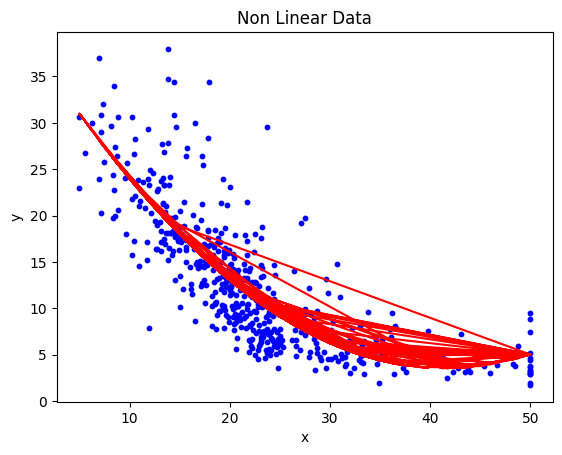

In [39]:
#Plot the fitted regression line

plt.scatter(x, y, s = 10, color = 'b')
plt.plot(x, model.predict(x_poly), color = "r")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non Linear Data')
plt.show()

Depending on the values and the graph, the Regression model better suited for the data is Non-Linear Model, Coefficients of x are [-1.71502726  0.02068709]
Intercept value is 39.04764267879377
MSE of polynomial model: 16.34
R2 score of non linear model: 0.678862281359654

In [40]:
#Using SGDRegressor
from sklearn.linear_model import SGDRegressor
clf1 = SGDRegressor(loss = 'squared_loss', max_iter = 1000, alpha = 0.00001)
clf1.fit(x_poly, y)
Y_pred = clf1.predict(x_poly)

print('Score', clf1.score(x_poly, y))

print("Coefficients: \n", clf1.coef_)
print("Y_intercept", clf1.intercept_)

print("Mean squared error: %.2f" % mean_squared_error(y, Y_pred ))

Score -1.803144062095183e+26
Coefficients: 
 [-1.55746900e+11 -1.16734114e+11]
Y_intercept [-2.84866618e+10]
Mean squared error: 9176917666447004619306434560.00


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


In [41]:
#https://scikit-learn.org/stable/datasets/index.html
#from sklearn.datasets import load_diabetes

In [42]:
# Importing the libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error

In [43]:
path = 'yield.csv'
df1 = pd.read_csv(path)
df1.head()

,Temp,Yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6


In [44]:
df1.shape

(15, 2)

In [45]:
# Convert it into pandas dataframe
data = pd.DataFrame(df1)
data.head()

,Temp,Yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6


In [46]:
# Target (dependent variable) and features (independent variables)
y = data["Yield"]
x = data['Temp']

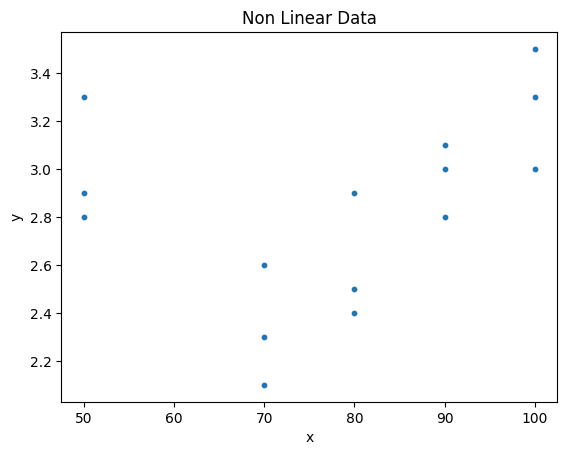

In [47]:
# Plot the data
plt.scatter(x, y, s = 10) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Non Linear Data') 
plt.show()

In [48]:
x = x.values.reshape(-1,1)

In [49]:
#polynomial degree 2
poly_features = PolynomialFeatures(degree = 2, include_bias = False) 
x_poly = poly_features.fit_transform(x) 

model = LinearRegression() 
model.fit(x_poly, y) 

print('Coefficients of x are', model.coef_) 
print('Intercept value is', model.intercept_) 

# Predict 
y_deg2 = model.predict(x_poly)  

# model evaluation 
print('MSE of Polyregression model: %.2f' % mean_squared_error(y, y_deg2) ) 
print('R2 score of Non Linear model: ', model.score(x_poly, y))

Coefficients of x are [-0.15371134  0.0010756 ]
Intercept value is 7.960481099656357
MSE of Polyregression model: 0.05
R2 score of Non Linear model:  0.6732052768464262


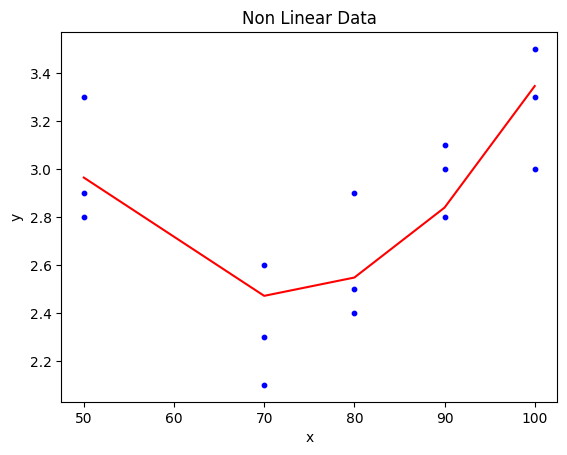

In [50]:
#Plot the fitted regression line

plt.scatter(x, y, s = 10, color ='b') 
plt.plot(x, model.predict(x_poly), color ='r') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Non Linear Data') 
plt.show()

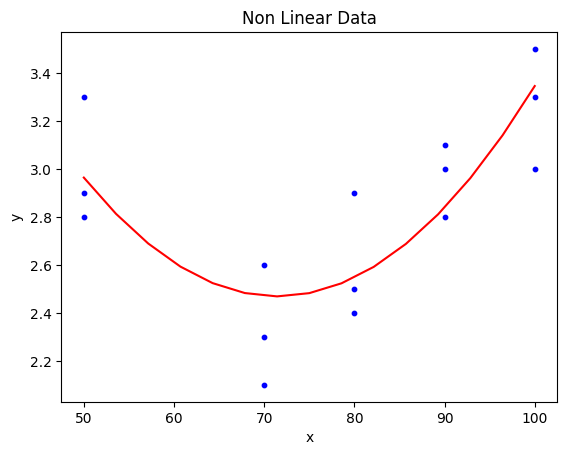

In [51]:
#Plot the fitted regression line
x_new = np.linspace(50, 100, 15).reshape(15, 1) 
x_new_poly = poly_features.fit_transform(x_new) 
y_new = model.predict(x_new_poly) 

plt.scatter(x, y, s = 10, color ='b') 
plt.plot(x_new, y_new, color ='r') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Non Linear Data') 
plt.show()

In [52]:
#Using SGDRegressor
from sklearn.linear_model import SGDRegressor
clf1 = SGDRegressor(loss = 'squared_loss', n_iter = 1000, alpha = 0.001)
clf1.fit(x_poly, y)
Y_pred = clf1.predict(x_poly)

print('Score', clf1.score(x_poly, y))

print("Coefficients: \n", clf1.coef_)
print("Y_intercept", clf1.intercept_)

print("Mean squared error: %.2f" % mean_squared_error(y, Y_pred))

TypeError: __init__() got an unexpected keyword argument 'n_iter'

In [ ]:
#Conclusion
